# Principal Components Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

movies = pd.read_csv("../data/movies_with_words.csv")
movies.head()

,adult,backdrop_path,id,original_language,original_title,overview,popularity,poster_path,release_date,title,...,music,which,soon,know,them,wing,comedy,form,test,mall
0,0,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,299536,en,Avengers: Infinity War,as the avengers and their allies have continue...,153.811,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,2018-04-25,Avengers: Infinity War,...,0,0,0,0,1,0,0,0,0,0
1,0,/5zfVNTrkhMu673zma6qhFzG01ig.jpg,300668,en,Annihilation,a biologist signs up for a dangerous secret e...,29.516,/d3qcpfNwbAMCNqWDHzPQsUYiUgS.jpg,2018-02-22,Annihilation,...,0,0,0,0,0,0,0,0,0,0
2,0,/zjG95oDnBcFKMPgBEmmuNVOMC90.jpg,299782,en,The Other Side of the Wind,surrounded by fans and skeptics grizzled dire...,6.820,/kFky1paYEfHxfCYByEc9g7gn6Zk.jpg,2018-11-02,The Other Side of the Wind,...,0,0,0,0,0,0,0,0,0,0
3,0,/q9hnJ9SzwcF30seRtXEzLd5l1gw.jpg,351044,en,Welcome to Marwen,when a devastating attack shatters mark hoganc...,61.973,/o45VIAUYDcVCGuzd43l8Sr5Dfti.jpg,2018-12-21,Welcome to Marwen,...,0,0,0,1,0,0,0,0,1,0
4,0,/AmO8I38bkHwKhgxPNrd6djBQyPU.jpg,361292,en,Suspiria,a darkness swirls at the center of a world ren...,41.461,/dzWTnkert9EoiPWldWJ15dnfAFl.jpg,2018-10-11,Suspiria,...,0,0,0,0,0,0,0,0,0,0


The function `process_data` turns the data into features that are usable.

In [4]:
def process_data(data, features):
    """
    Processes input data for linear regression model, returns feature 
    matrix `X` and array of actual values `y`
    
    Args:
        data     - dataframe with the data
        features - columns of features to choose
    """
    data = data.dropna(subset=["overview_len"])
    
    data = pd.get_dummies(data,
                          prefix = "wkdy",
                          columns = ["day_of_week"],
                          drop_first = True
                         )
        
    X = data[features]
    y = data["rating"]
    return X, y

In [5]:
features = ['adult', 'popularity', 'vote_count',
       'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'overview_len', 'month',
       'day', 'wkdy_Sun', 'wkdy_Mon', 'wkdy_Tue', 'wkdy_Wed', 'wkdy_Thu', 'wkdy_Sat', 
       'this', 'after', 'known','side', 'killer', 'business', 'seem', 'follows', 'become', 'house',
       'meets', 'aunt', 'each', 'making', 'place', 'only', 'foot',
       'perform', 'lore', 'give', 'found', 'front', 'women', 'ours',
       'behind', 'kill', 'attempt', 'disco', 'mysterious', 'king', 'less',
       'turn', 'begin', 'years', 'range', 'discover', 'through', 'take',
       'group', 'film', 'gain', 'great', 'trip', 'care', 'couple', 'even',
       'party', 'cove', 'down', 'dire', 'story', 'father', 'disc',
       'under', 'ller', 'busi', 'direct', 'light', 'does', 'dangerous',
       'break', 'evil', 'host', 'survive', 'meet', 'realize', 'murder',
       'college', 'documentary', 'self', 'super', 'across', 'cover',
       'rough', 'cross', 'hard', 'brother', 'childhood', 'small',
       'director', 'feat', 'danger', 'dang', 'between', 'mean',
       'christmas', 'year', 'press', 'ross', 'dark', 'follow', 'document',
       'first', 'brea', 'anger', 'strange', 'hunt', 'secret', 'takes',
       'fall', 'music', 'which', 'soon', 'know', 'them', 'wing', 'comedy',
       'form', 'test', 'mall']

In [6]:
X, _ = process_data(movies, features)
X

,adult,popularity,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,music,which,soon,know,them,wing,comedy,form,test,mall
0,0,153.811,12490,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,29.516,4232,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,6.820,55,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,61.973,174,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,41.461,579,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,0,12.852,89,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2455,0,6.257,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2456,0,8.735,6,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2457,0,35.558,3538,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
X.to_csv("../data/movies_features.csv", index=False)

We use `sklearn.decomposition.PCA` to perform PCA on `X`.

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA()
pcX = pca.fit_transform(X)

The two plots below are scree plots.

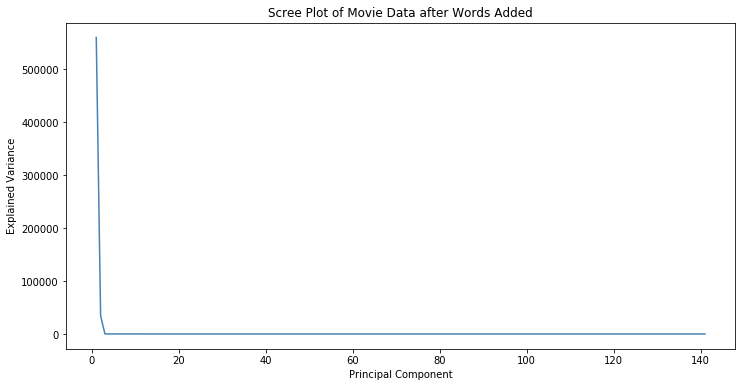

In [16]:
plt.figure(figsize=[12,6])
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_, color="steelblue")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Scree Plot of Movie Data after Words Added")
plt.savefig("../figures/scree_whole.png");

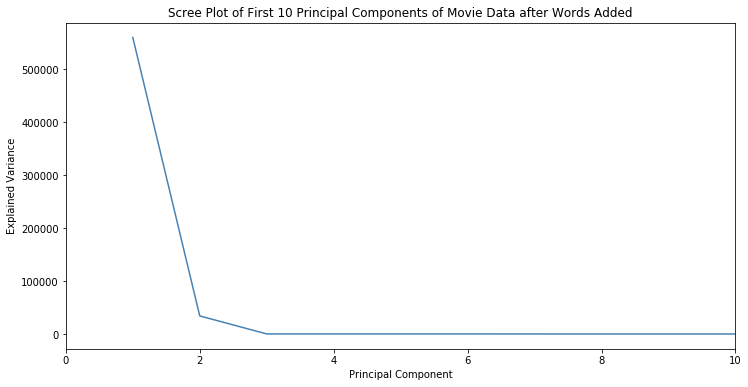

In [17]:
plt.figure(figsize=[12,6])
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_, color="steelblue")
plt.xlim([0,10])
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Scree Plot of First 10 Principal Components of Movie Data after Words Added")
plt.savefig("../figures/scree_first_10.png");

The plot below shows the proportion of explained variance for the first 10 principal components.

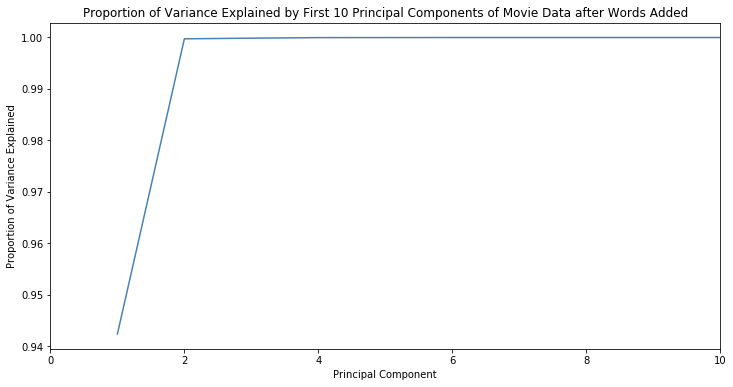

In [18]:
plt.figure(figsize=[12,6])
plt.plot(np.arange(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), color="steelblue")
plt.xlim([0,10])
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.title("Proportion of Variance Explained by First 10 Principal Components of Movie Data after Words Added")
plt.savefig("../figures/pca_var_explained.png");

The plot below shows the data plotted along the first two principal components.

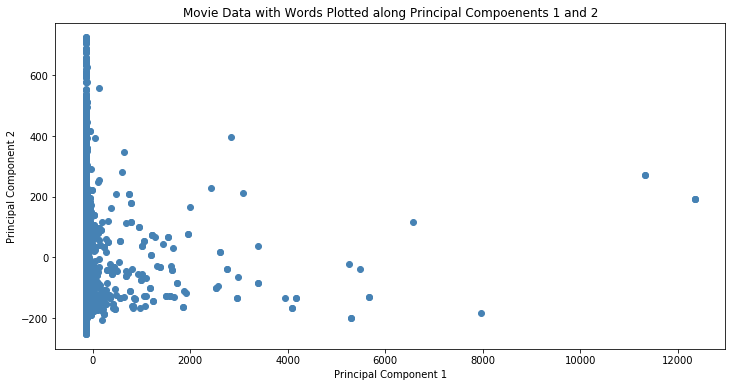

In [19]:
plt.figure(figsize=[12,6])
plt.scatter(pcX[:,0], pcX[:,1], color="steelblue")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Movie Data with Words Plotted along Principal Compoenents 1 and 2")
plt.savefig("../figures/pc1_pc2.png")

In [14]:
pcs = pd.DataFrame(pcX, columns=["PC %d" % i for i in np.arange(1, pcX.shape[1] + 1)])
pcs.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 132,PC 133,PC 134,PC 135,PC 136,PC 137,PC 138,PC 139,PC 140,PC 141
0,12350.444148,190.995072,12.300166,17.408367,2.588419,-0.278994,0.614853,0.276107,-0.333016,0.143030,...,-0.012873,-0.020998,0.007717,0.011506,-0.002997,-0.007225,0.009620,0.011640,0.001822,-0.004263
1,4090.831081,-165.653317,0.845095,-19.534432,2.318809,0.134133,-0.022816,0.343252,-0.174212,-0.264881,...,-0.027714,0.007085,-0.031735,0.038581,0.002948,-0.002091,-0.012035,-0.008399,0.001216,-0.001528
2,-86.024985,-84.874823,-11.721010,6.149268,-4.121327,-0.535462,-0.187703,-0.897667,0.014505,0.163935,...,-0.024499,-0.001277,0.005442,0.012827,0.023095,0.005567,0.005295,0.004322,-0.003752,0.001605
3,34.019080,139.827336,21.174719,53.022887,-0.968216,-0.012930,0.324001,-0.801337,0.000539,-0.837831,...,-0.034109,-0.043337,0.011244,-0.022342,0.002435,0.005509,0.015470,0.005850,0.012618,0.004642
4,438.421724,-32.001673,4.657397,31.760695,-1.005724,-0.252888,-0.036957,1.065283,-0.165022,-0.367273,...,-0.006287,0.010771,0.007543,-0.011808,0.005560,0.013012,0.010144,-0.000286,0.003223,0.001431


In [15]:
pcs.to_csv("../data/movies_principal_components.csv", index=False)